In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing

In [2]:
df = pd.read_csv('./hiring.csv')

In [3]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [9]:
len(df.index)

9

In [10]:
df.loc[len(df.index)] = ['two', 7.0, 3,1000000]

In [11]:
df['experience'] = df['experience'].fillna('zero')
# df['experience'] = df['experience'].fillna('zero')

In [12]:
df.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000
8,eight,9.0,9,10000
9,two,7.0,3,1000000


In [11]:
# !pip3 install word2number

In [13]:
# pip3 install word2number
from word2number import w2n


In [14]:
df.experience = df.experience.apply(w2n.word_to_num)

In [15]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [16]:
dfexpmin = df['experience'].mean()

In [17]:
dfexpmin

4.8

In [18]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000
8,8,9.0,9,10000
9,2,7.0,3,1000000


In [21]:
# df['experience'] = df['0'].replace([dfexpmin])
#df['experience1'] = df.replace(['0'],'nan',inplace=True)
df.replace(['nan'], dfexpmin , inplace=True)

In [22]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000
8,8,9.0,9,10000
9,2,7.0,3,1000000


In [23]:
df1 = df.ffill(axis = 1)

In [24]:
df1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9.0,50000.0
1,0.0,8.0,6.0,45000.0
2,5.0,6.0,7.0,60000.0
3,2.0,10.0,10.0,65000.0
4,7.0,9.0,6.0,70000.0
5,3.0,7.0,10.0,62000.0
6,10.0,10.0,7.0,72000.0
7,11.0,7.0,8.0,80000.0
8,8.0,9.0,9.0,10000.0
9,2.0,7.0,3.0,1000000.0


In [289]:
# df.apply(preprocessing.LabelEncoder().fit_transform(df['experience']))

In [25]:
df1.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9.0,50000.0
1,0.0,8.0,6.0,45000.0
2,5.0,6.0,7.0,60000.0
3,2.0,10.0,10.0,65000.0
4,7.0,9.0,6.0,70000.0


In [26]:
df1.rename(columns = {'salary($)':'salary','experience':'Experience','test_score(out of 10)':'Test_Score','interview_score(out of 10)':'interviewscore'}, inplace = True)

In [27]:
df1

,Experience,Test_Score,interviewscore,salary
0,0.0,8.0,9.0,50000.0
1,0.0,8.0,6.0,45000.0
2,5.0,6.0,7.0,60000.0
3,2.0,10.0,10.0,65000.0
4,7.0,9.0,6.0,70000.0
5,3.0,7.0,10.0,62000.0
6,10.0,10.0,7.0,72000.0
7,11.0,7.0,8.0,80000.0
8,8.0,9.0,9.0,10000.0
9,2.0,7.0,3.0,1000000.0


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
y = df1['salary']

In [30]:
x = df1.iloc[:,:-1]

In [300]:
print(x)

   Experience  Test_Score  interviewscore
0         0.0         8.0             9.0
1         0.0         8.0             6.0
2         5.0         6.0             7.0
3         2.0        10.0            10.0
4         7.0         9.0             6.0
5         3.0         7.0            10.0
6        10.0        10.0             7.0
7        11.0         7.0             8.0


In [31]:
reg  = LinearRegression()

In [32]:
aa = reg.fit(x,y)

In [33]:
aa.predict([[2,3.0,6]])

array([430820.56413706])

In [34]:
aa.coef_

array([-13995.8928549 , -18533.06398038, -97142.2918956 ])

In [35]:
aa.intercept_

1097265.2931615822

In [36]:
final = 116.66950551 *2773 +18756.28806982* 3.0 +26*-3675.75111708+231586.00639409182

In [37]:
final

515809.88033870177

Finding Ourliers

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.covariance import EllipticEnvelope
sns.set_style("darkgrid")



In [39]:
# Make a simulated dataset with 2 features
# Normally distributed dataset
X, _ = make_blobs(n_samples=300, n_features=2,
                  centers=1, shuffle=True, random_state=1)



In [43]:
X

array([[-2.68144585e+00,  5.20101811e+00],
       [-9.75558578e-01,  4.05307989e+00],
       [-2.87930430e+00,  6.85585852e+00],
       [-1.61589091e+00,  4.18017563e+00],
       [-1.46126019e+00,  4.52549851e+00],
       [-1.13009458e+00,  4.54419108e+00],
       [-1.79553723e+00,  3.60922008e+00],
       [-7.58703957e-01,  3.72276201e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-2.08241687e+00,  4.49295428e+00],
       [-1.91854276e+00,  4.59578307e+00],
       [-2.73245642e-01,  4.95461945e+00],
       [-1.00754365e-01,  4.51589257e+00],
       [-2.65657970e+00,  4.29969588e+00],
       [-2.76727241e+00,  4.38877155e+00],
       [-1.41076074e+00,  4.10984872e+00],
       [-2.99151157e+00,  2.64580131e+00],
       [-4.16600056e+00,  2.29232595e+00],
       [-1.34052081e+00,  4.15711949e+00],
       [-1.76955140e+00,  4.41503881e+00],
       [ 1.50975008e-01,  3.10076295e+00],
       [-1.82775875e+00,  4.23230952e+00],
       [-5.27930518e-01,  5.92630669e+00],
       [-1.

In [40]:
elpenv = EllipticEnvelope(contamination=0.025, 
                          random_state=1)

# Returns 1 of inliers, -1 for outliers


In [41]:
pred = elpenv.fit_predict(X)



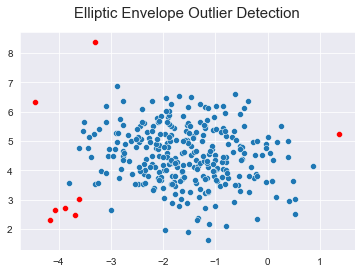

In [42]:
# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = X[outlier_index]

# Plot the data
sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=outlier_values[:,0], 
                y=outlier_values[:,1], color='r')
plt.title("Elliptic Envelope Outlier Detection", fontsize=15, pad=15)
plt.savefig("Elliptic Envelope Detection.png", dpi=80)

In [308]:
import pickle

In [309]:
# create an iterator object with write permission - model.pkl
with open('salary.pkl', 'wb') as files:
    pickle.dump(aa, files)

In [310]:
# load saved model
with open('salary.pkl' , 'rb') as f:
    lr = pickle.load(f)

In [311]:
c= lr.predict(x)

In [ ]:
from sklearn.metrics import mean_absolute_error